In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from pandas import read_csv

#reading the csv file and selecting important relevent features

data = read_csv('/kaggle/input/austinhousingprices/austinHousingData.csv', delimiter = ',')

columns = ['propertyTaxRate', 'garageSpaces', 'hasAssociation', 'hasCooling', 'hasHeating', 'hasSpa', 
           'hasView', 'parkingSpaces', 'yearBuilt', 'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
           'numOfHighSchools', 'avgSchoolSize',
           'latest_saleyear', 'numOfAccessibilityFeatures', 'numOfAppliances',
           'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures', 'numOfWaterfrontFeatures',
           'numOfWindowFeatures', 'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
           'avgSchoolDistance', 'avgSchoolRating', 'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'city', 'homeType']

#Organize data into x and y datasets
x_initial = data[columns]
y = data['latestPrice']

x = pd.get_dummies(x_initial, columns=['city', 'homeType'], drop_first=True)

In [2]:
#print first 5 training examples
print("X Data:\n")
print(x[:5])

print("Y Data (prices):\n")
for value in y[:5]:
    print(f"${value:,}")

X Data:

   propertyTaxRate  garageSpaces  hasAssociation  hasCooling  hasHeating  \
0             1.98             2            True        True        True   
1             1.98             2            True        True        True   
2             1.98             0            True        True        True   
3             1.98             2            True        True        True   
4             1.98             0            True        True        True   

   hasSpa  hasView  parkingSpaces  yearBuilt  numOfPrimarySchools  ...  \
0   False    False              2       2012                    1  ...   
1   False    False              2       2013                    1  ...   
2   False    False              0       2018                    0  ...   
3   False    False              2       2013                    1  ...   
4   False    False              0       2002                    1  ...   

   city_west lake hills  homeType_Condo  homeType_Mobile / Manufactured  \
0             

In [3]:
x.head()

,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasHeating,hasSpa,hasView,parkingSpaces,yearBuilt,numOfPrimarySchools,...,city_west lake hills,homeType_Condo,homeType_Mobile / Manufactured,homeType_MultiFamily,homeType_Multiple Occupancy,homeType_Other,homeType_Residential,homeType_Single Family,homeType_Townhouse,homeType_Vacant Land
0,1.98,2,True,True,True,False,False,2,2012,1,...,False,False,False,False,False,False,False,True,False,False
1,1.98,2,True,True,True,False,False,2,2013,1,...,False,False,False,False,False,False,False,True,False,False
2,1.98,0,True,True,True,False,False,0,2018,0,...,False,False,False,False,False,False,False,True,False,False
3,1.98,2,True,True,True,False,False,2,2013,1,...,False,False,False,False,False,False,False,True,False,False
4,1.98,0,True,True,True,False,False,0,2002,1,...,False,False,False,False,False,False,False,True,False,False


In [4]:
x.describe()

,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolSize,latest_saleyear,...,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,...,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.994085,1.229187,1.224507,1988.554743,0.940676,0.049173,1.035990,0.976798,1237.304660,2019.078241,...,0.208490,0.018852,1.190840e+05,2208.323314,1.838495,5.779912,14.857228,2.683010,3.440380,1.467273
std,0.053102,1.352117,1.352732,21.579458,0.236516,0.234937,0.263633,0.292043,326.513311,0.813941,...,0.488331,0.206775,1.225272e+07,1378.576119,1.068376,1.860276,1.741857,1.054445,0.849942,0.523697
min,1.980000,0.000000,0.000000,1905.000000,0.000000,0.000000,0.000000,0.000000,396.000000,2018.000000,...,0.000000,0.000000,1.000000e+02,300.000000,0.200000,2.333333,10.000000,0.000000,0.000000,1.000000
25%,1.980000,0.000000,0.000000,1974.000000,1.000000,0.000000,1.000000,1.000000,966.000000,2018.000000,...,0.000000,0.000000,6.534000e+03,1483.000000,1.100000,4.000000,14.000000,2.000000,3.000000,1.000000
50%,1.980000,1.000000,1.000000,1993.000000,1.000000,0.000000,1.000000,1.000000,1287.000000,2019.000000,...,0.000000,0.000000,8.276000e+03,1975.000000,1.566667,5.778694,15.000000,3.000000,3.000000,1.000000
75%,1.980000,2.000000,2.000000,2006.000000,1.000000,0.000000,1.000000,1.000000,1496.000000,2020.000000,...,0.000000,0.000000,1.089000e+04,2687.000000,2.266667,7.000000,16.000000,3.000000,4.000000,2.000000
max,2.210000,22.000000,22.000000,2020.000000,2.000000,2.000000,3.000000,2.000000,1913.000000,2021.000000,...,4.000000,8.000000,1.508483e+09,109292.000000,9.000000,9.500000,19.000000,27.000000,20.000000,4.000000


In [5]:
from folium.plugins import HeatMap, MarkerCluster
import folium

def plot_houses_heatmap(df, lat_col='latitude', lon_col='longitude', price_col='latestPrice'):
    """
    Plots houses on a simplified map of Austin using folium with a heatmap.

    Parameters:
        df (pd.DataFrame): DataFrame containing house information with latitude, longitude, and price columns.
        lat_col (str): Column name for latitude.
        lon_col (str): Column name for longitude.
        price_col (str): Column name for the price of the house.
    
    Returns:
        folium.Map: A simplified map with a heatmap layer.
    """
    # Define the center of Austin for the map
    austin_center = [30.2672, -97.7431]
    
    # Initialize the map centered on Austin
    house_map = folium.Map(location=austin_center, zoom_start=11)
    
    # Prepare data for the heatmap: using latitude, longitude, and optionally price
    heat_data = df[[lat_col, lon_col]].values.tolist()
    
    # Add a heatmap layer
    HeatMap(heat_data, radius=8, blur=12, max_zoom=1).add_to(house_map)
    
    return house_map

plot_houses_heatmap(data, lat_col='latitude', lon_col='longitude', price_col='latestPrice')

In [6]:
#print size of data set (num features, num training examples)
print(f"x_train size: {np.shape(x)}")
print(f"y_train size: {np.shape(y)}")

x_train size: (15171, 47)
y_train size: (15171,)


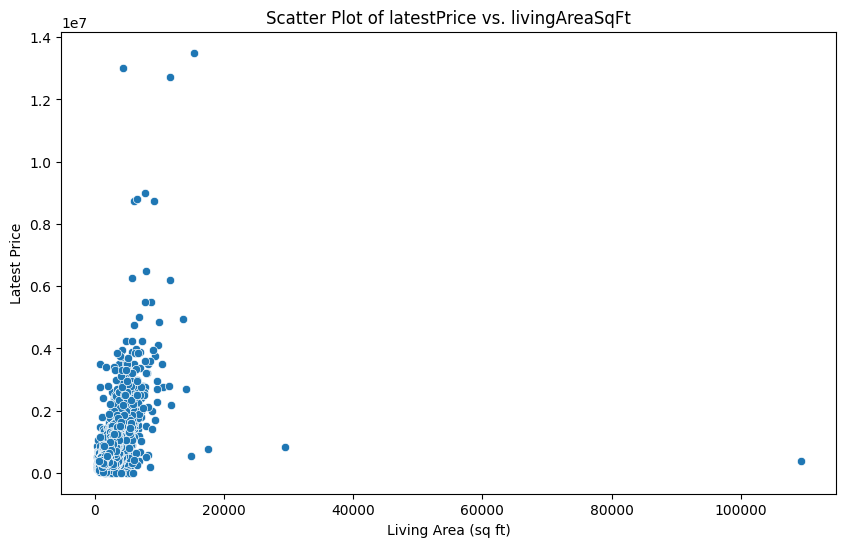

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['livingAreaSqFt'], y=data['latestPrice'])
plt.title('Scatter Plot of latestPrice vs. livingAreaSqFt')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Latest Price')
plt.show()

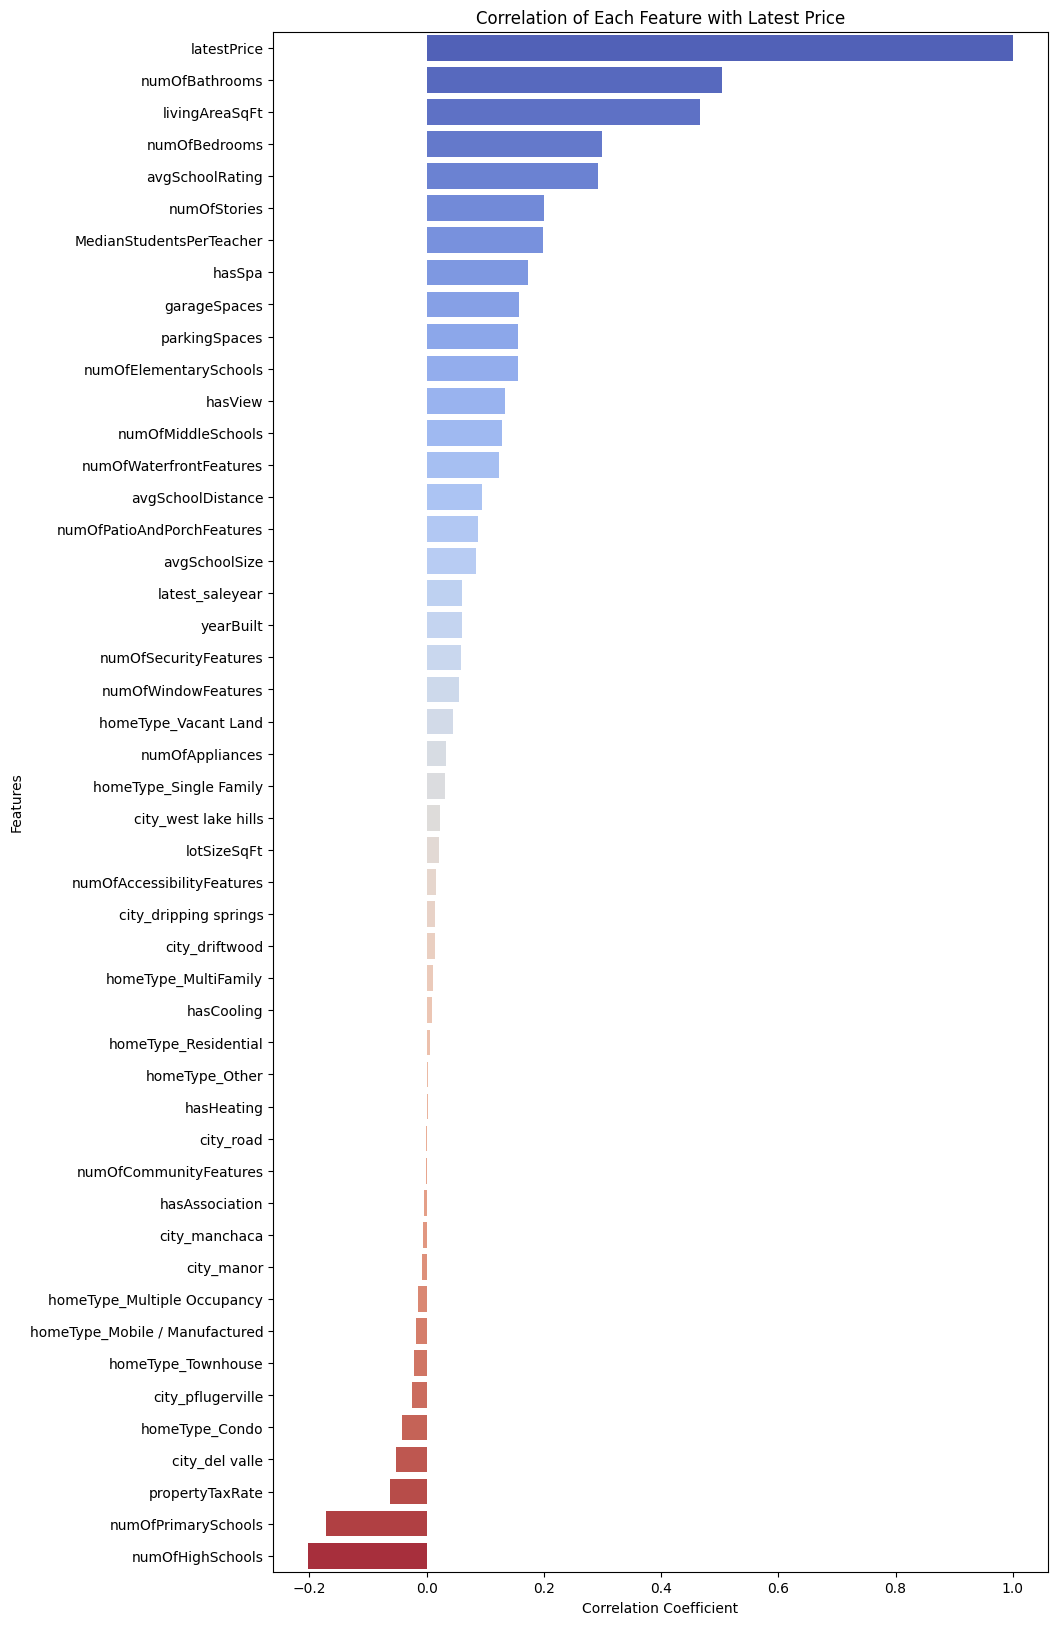

In [8]:
# Calculate the correlation between each feature in x and the target variable y
x['latestPrice'] = y  # Temporarily add 'latestPrice' to calculate correlation
correlation_matrix_x = x.corr()

# Extract the correlation values with 'latestPrice'
price_correlation_x = correlation_matrix_x['latestPrice'].sort_values(ascending=False)

# Plotting the correlation values
plt.figure(figsize=(10, 20))
sns.barplot(y=price_correlation_x.index, x=price_correlation_x.values, palette='coolwarm')
plt.title('Correlation of Each Feature with Latest Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Remove 'latestPrice' from x after calculating correlation
x = x.drop(columns=['latestPrice'])


In [9]:
# Calculate the correlation between each feature in x and the target variable y
x['latestPrice'] = y  # Temporarily add 'latestPrice' to calculate correlation
correlation_matrix_x = x.corr()

price_correlation_x = correlation_matrix_x['latestPrice'].abs().sort_values(ascending=False)
print(price_correlation_x)

num_features = 20

top_features = price_correlation_x.index[1:num_features+1]

x_top_features = x[top_features]

x = x.drop(columns=['latestPrice'])

x = x_top_features

print(x_top_features.columns.tolist())
print(f"Number of features selected: {x_top_features.shape[1]}")


latestPrice                       1.000000
numOfBathrooms                    0.504738
livingAreaSqFt                    0.467034
numOfBedrooms                     0.299839
avgSchoolRating                   0.293101
numOfHighSchools                  0.201821
numOfStories                      0.200555
MedianStudentsPerTeacher          0.198208
hasSpa                            0.173084
numOfPrimarySchools               0.170927
garageSpaces                      0.157443
parkingSpaces                     0.156811
numOfElementarySchools            0.155988
hasView                           0.133969
numOfMiddleSchools                0.127838
numOfWaterfrontFeatures           0.123979
avgSchoolDistance                 0.094156
numOfPatioAndPorchFeatures        0.087936
avgSchoolSize                     0.085167
propertyTaxRate                   0.062179
latest_saleyear                   0.059942
yearBuilt                         0.059692
numOfSecurityFeatures             0.058349
numOfWindow

**VARIANCE THRESHOLDING**

In [10]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
selector.fit(x)

mask = selector.get_support()

low_variance_features = x.columns[~mask]

print(low_variance_features.tolist())

['numOfWaterfrontFeatures', 'propertyTaxRate']


**CORRELATION BASED FEATURE SELECTION**

In [11]:
corr_matrix = x.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(to_drop)

['parkingSpaces']


**RECURSIVE FEATURE ELIMINATION**

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
selector = RFE(model, n_features_to_select=10)
selector.fit(x, y)

mask = selector.get_support()

rfe_removed_features = x.columns[~mask]

print(rfe_removed_features, len(rfe_removed_features), np.shape(x))

Index(['livingAreaSqFt', 'numOfBedrooms', 'MedianStudentsPerTeacher',
       'garageSpaces', 'parkingSpaces', 'numOfMiddleSchools',
       'avgSchoolDistance', 'numOfPatioAndPorchFeatures', 'avgSchoolSize',
       'latest_saleyear'],
      dtype='object') 10 (15171, 20)


**PRINCIPAL COMPONENT ANALYSIS**

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(x)

explained_variance = pca.explained_variance_ratio_
pca_removed_features = [x.columns[i] for i, v in enumerate(explained_variance) if v < 0.01]

print(pca_removed_features)

['numOfBedrooms', 'avgSchoolRating', 'numOfHighSchools', 'numOfStories', 'MedianStudentsPerTeacher', 'hasSpa', 'numOfPrimarySchools', 'garageSpaces']


**RANDOM FOREST**

In [14]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x, y)

importances = model.feature_importances_

low_importance_features = x.columns[importances < 0.01]

print(low_importance_features, len(low_importance_features), np.shape(x))

Index(['hasSpa', 'numOfPrimarySchools', 'numOfElementarySchools', 'hasView',
       'numOfMiddleSchools', 'numOfWaterfrontFeatures'],
      dtype='object') 6 (15171, 20)


In [15]:
#variation dimension reduction (drop features with low variation)
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01) #remove features with <0.01 variation
selector.fit(x)
mask = selector.get_support() #boolean array where True means keep feature and vice-versa

removed_features = x.columns[~mask] #negated so choose features = False in mask
x_reduced = x.loc[:, mask]
print(removed_features)

Index(['numOfWaterfrontFeatures', 'propertyTaxRate'], dtype='object')


In [16]:
#pairwise reduction (drop one of the highly correlated pairs if there's highly correlated pairs)
correlation_matrix = x.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
x_reduced = x.drop(columns=to_drop)
print(to_drop)

['parkingSpaces']


In [17]:
#correlation
correlations = x.corrwith(y).abs()
to_drop = correlations[correlations < 0.05].index
x_reduced = x.drop(columns=to_drop)
print(to_drop)

Index([], dtype='object')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


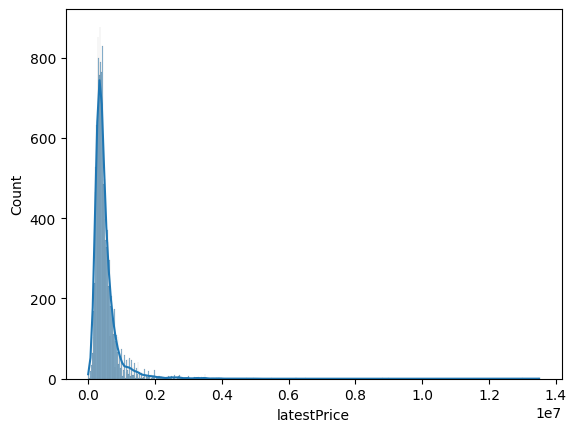

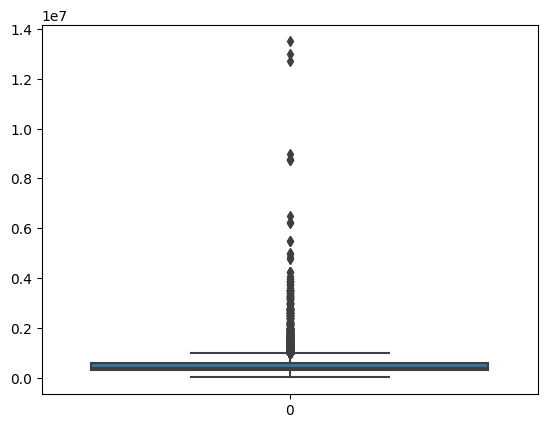

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y, kde=True)
plt.show()

sns.boxplot(y)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


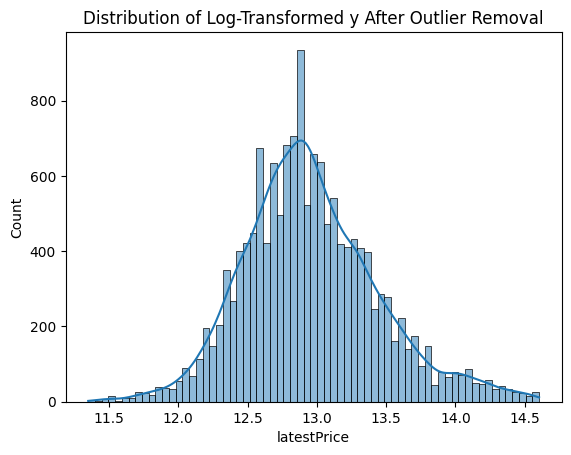

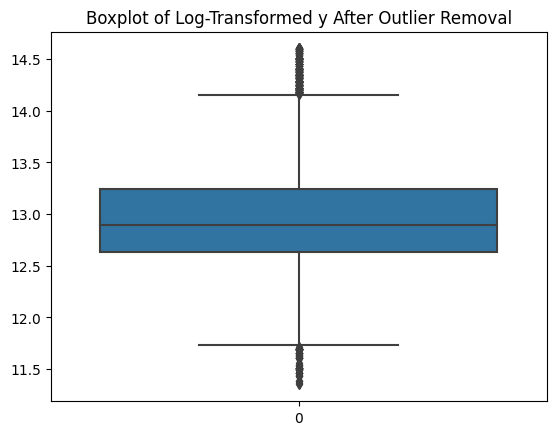

In [19]:
'''def remove_outliers(data, threshold):
    mean = np.mean(data)
    std = np.std(data)
    filter_mask = (data > mean - threshold * std) & (data < mean + threshold * std)
    filtered_data = data[filter_mask]
    return filtered_data, filter_mask

y_log = np.log1p(y)

y_outliers_removed, filter_mask = remove_outliers(y_log, 3)
x_outliers_removed = x[filter_mask]

sns.histplot(y_outliers_removed, kde=True)
plt.show()

sns.boxplot(y_outliers_removed)
plt.show()'''
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers(data, threshold):
    mean = np.mean(data)
    std = np.std(data)
    filter_mask = (data > mean - threshold * std) & (data < mean + threshold * std)
    filtered_data = data[filter_mask]
    return filtered_data, filter_mask

# Apply logarithmic transformation to y to reduce skewness
y_log = np.log1p(y)

# Remove outliers from y_log based on the threshold (3 standard deviations)
y_outliers_removed, filter_mask = remove_outliers(y_log, 3)

# Filter x to match the rows without outliers in y
x_outliers_removed = x[filter_mask]

# Plot the distribution of y after removing outliers
sns.histplot(y_outliers_removed, kde=True)
plt.title('Distribution of Log-Transformed y After Outlier Removal')
plt.show()

# Boxplot to visualize the distribution and any remaining outliers
sns.boxplot(y_outliers_removed)
plt.title('Boxplot of Log-Transformed y After Outlier Removal')
plt.show()


In [20]:
#organize data into testing and training sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_outliers_removed, y_outliers_removed, test_size = 0.30, random_state = 1)

x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)



In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Normalization

normalizer = Normalization()
normalizer.adapt(x_train)

2024-11-12 23:52:56.842030: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-12 23:52:56.842260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-12 23:52:57.019764: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

model = XGBRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

test_loss = mean_squared_error(y_test, y_pred)
print(f"Test Loss (MSE): {test_loss}")

R² Score: 0.7461712765287571
Test Loss (MSE): 0.059287767857313156


Epoch 1/55
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 129.6297 - val_loss: 82.8803
Epoch 2/55
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 74.5225 - val_loss: 53.2145
Epoch 3/55
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47.4946 - val_loss: 32.8662
Epoch 4/55
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 28.9503 - val_loss: 19.2264
Epoch 5/55
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.6554 - val_loss: 10.5338
Epoch 6/55
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0288 - val_loss: 5.3691
Epoch 7/55
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4567 - val_loss: 2.5466
Epoch 8/55
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0649 - val_loss: 1.1631
Epoch 9/55
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9399 - val_loss: 0.5663
Epoch 10/55
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4803 - val_loss: 0.3439
Epoch 11/55
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2994 - val_loss: 0.2731
Epoch 12/55
263/263 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 20)             │            41 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │           594 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,558 (17.81 KB)

 Trainable params: 1,505 (5.88 KB)

 Non-trainable params: 41 (168.00 B)

 Optimizer params: 3,012 (11.77 KB)

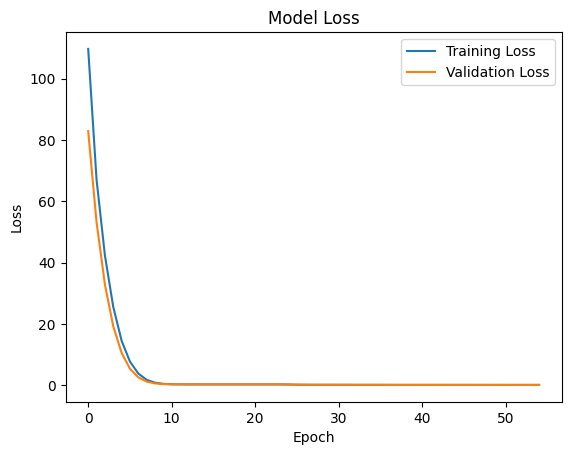

In [23]:
import tensorflow as tf

# Define the neural network model
model = tf.keras.Sequential(
    [
        normalizer,
        tf.keras.layers.Dense(32, activation='tanh'),
        tf.keras.layers.Dense(18, activation='tanh'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(4, activation='tanh'),
        tf.keras.layers.Dense(1, activation='linear')
    ]
)

# Compile the model
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015)
)

# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model with early stopping and batch size of 32
history = model.fit(
    x_train, y_train, 
    epochs=55, 
    validation_split=0.2, 
    batch_size=32, 
    callbacks=[early_stopping]
)

model.summary()

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [24]:
import tensorflow as tf
from tensorflow.keras import layers
from keras_tuner import RandomSearch

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(normalizer)  # Apply normalization layer first

    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(
            layers.Dense(
                units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
                activation=hp.Choice('activation', values=['relu', 'tanh', 'elu', 'swish'])
            )
        )
        model.add(
            layers.Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))
        )

    # Output layer with a single neuron for regression (no activation)
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='mean_squared_error'
    )
    
    return model

# Initialize Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=150,  # Number of different models to try
    executions_per_trial=2,  # Number of times to evaluate each model
    directory='tuner_results',
    project_name='house_price_prediction'
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

tuner.search(
    x_train, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping],
    batch_size=32  # Start with a default batch size (this can also be tuned)
)

best_model = tuner.get_best_models(num_models=1)[0]

best_model.summary()


Trial 150 Complete [00h 00m 39s]
val_loss: 0.1247367262840271

Best val_loss So Far: 0.07387880980968475
Total elapsed time: 02h 51m 49s


/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 20)             │            41 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 112)            │        14,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         3,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 112)            │         3,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           113 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,602 (96.11 KB)

 Trainable params: 24,561 (95.94 KB)

 Non-trainable params: 41 (168.00 B)

In [25]:
import tensorflow as tf
from keras_tuner import RandomSearch

# Define model-building function for Keras Tuner
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(normalizer)  # Assuming normalizer is pre-defined
    
    # Define the number of layers
    num_layers = hp.Int('num_layers', 2, 5)  # Define a range for the number of layers
    for i in range(num_layers):
        # For each layer, choose the number of units and activation function independently
        model.add(
            tf.keras.layers.Dense(
                units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
                activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh', 'elu'])
            )
        )
        model.add(
            tf.keras.layers.Dropout(
                rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
            )
        )

    model.add(tf.keras.layers.Dense(1, activation='linear'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='mean_squared_error'
    )

    return model

tuner = RandomSearch(
    build_model,  # Function to build the model
    objective='val_loss',  # Objective to minimize
    max_trials=300,  # Number of different models to try
    executions_per_trial=2,  # Number of times to evaluate each model
    directory='tuner_results',  # Directory to save results
    project_name='house_price_prediction'  # Name of the tuning project
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

tuner.search(
    x_train, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping],
    batch_size=32  # You can also add this as a tunable parameter
)

tuner.results_summary()

best_model = tuner.get_best_models(num_models=1)[0]

best_model.summary()

best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters Found:")
print(best_hyperparameters.values)

for trial in tuner.oracle.get_best_trials(num_trials=5):  # Get the top 5 trials
    print(f"Trial {trial.trial_id}:")
    print(trial.hyperparameters.values)
    print(f"Validation Loss: {trial.score}")


Trial 300 Complete [00h 01m 18s]
val_loss: 0.13172342628240585

Best val_loss So Far: 0.07387880980968475
Total elapsed time: 06h 17m 30s
Results summary
Results in tuner_results/house_price_prediction
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 125 summary
Hyperparameters:
num_layers: 4
units_0: 128
activation: elu
dropout: 0.0
units_1: 112
learning_rate: 0.0040134742902291735
units_2: 32
units_3: 112
units_4: 128
Score: 0.07387880980968475

Trial 107 summary
Hyperparameters:
num_layers: 4
units_0: 48
activation: elu
dropout: 0.0
units_1: 64
learning_rate: 0.002041927912277331
units_2: 48
units_3: 64
units_4: 96
Score: 0.07466661557555199

Trial 137 summary
Hyperparameters:
num_layers: 3
units_0: 32
activation: elu
dropout: 0.0
units_1: 32
learning_rate: 0.0037702081059086687
units_2: 32
units_3: 32
units_4: 32
Score: 0.07526477426290512

Trial 180 summary
Hyperparameters:
num_layers: 4
units_0: 112
activation: swish
dropout: 0.0
units_1: 96
learning_rate

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 20)             │            41 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 112)            │        14,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         3,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 112)            │         3,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           113 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,602 (96.11 KB)

 Trainable params: 24,561 (95.94 KB)

 Non-trainable params: 41 (168.00 B)

Best Hyperparameters Found:
{'num_layers': 4, 'units_0': 128, 'activation': 'elu', 'dropout': 0.0, 'units_1': 112, 'learning_rate': 0.0040134742902291735, 'units_2': 32, 'units_3': 112, 'units_4': 128, 'activation_0': 'relu', 'activation_1': 'relu', 'activation_2': 'relu', 'activation_3': 'relu'}
Trial 125:
{'num_layers': 4, 'units_0': 128, 'activation': 'elu', 'dropout': 0.0, 'units_1': 112, 'learning_rate': 0.0040134742902291735, 'units_2': 32, 'units_3': 112, 'units_4': 128, 'activation_0': 'relu', 'activation_1': 'relu', 'activation_2': 'relu', 'activation_3': 'relu'}
Validation Loss: 0.07387880980968475
Trial 107:
{'num_layers': 4, 'units_0': 48, 'activation': 'elu', 'dropout': 0.0, 'units_1': 64, 'learning_rate': 0.002041927912277331, 'units_2': 48, 'units_3': 64, 'units_4': 96}
Validation Loss: 0.07466661557555199
Trial 137:
{'num_layers': 3, 'units_0': 32, 'activation': 'elu', 'dropout': 0.0, 'units_1': 32, 'learning_rate': 0.0037702081059086687, 'units_2': 32, 'units_3': 32, '

In [26]:
from sklearn.metrics import r2_score

test_loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0791
Test Loss: 0.07591744512319565
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R² Score: 0.674974712122162


In [27]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = xgb.XGBRegressor(n_estimators=100, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

R^2 Score: 0.7461712765287571


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators=150, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

R^2 Score: 0.7495835400211472


In [29]:
import tensorflow as tf
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test), verbose=0)
y_pred = model.predict(x_test)
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R^2 Score: 0.5458019808279838
